### Library

In [10]:
import warnings
warnings.filterwarnings('ignore')

### Dataframe Library
import pandas as pd
import numpy as np

### Viz Library
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Modeling Library

#### Statsmodel
import statsmodels as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima

#### Prophet
from prophet import Prophet

#### scikit-learn
import sklearn as sk
from sklearn.model_selection import TimeSeriesSplit

Information Source : 
- TimeSeries Split         : https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
- FB ts Prophet Paper link : https://peerj.com/preprints/3190/

### Function

#### Data Engineering

In [11]:
def extract_data(data):
    h,d,w,m = [0,0,0,0]
    arr_df  = [data,d,w,m]
    resamp_ =  ['','D','W','M']
    for i in range(1,len(arr_df)):
        arr_df[i] = data.resample(resamp_[i]).sum()
    return arr_df 

#### Vizualization

In [12]:
def acf_pacf(data,lag):
    plot_acf(data,lags=lag)
    plot_pacf(data,lags=lag)

#### Modeling

In [13]:
def train_test_split(data,month_test = 11):
    data  = data[data.index.year == 2022]
    train = data[data.index.month <= month_test]
    test  = data[data.index.month > month_test]

    return train, test

### Modeling

In [14]:
ex42 = pd.read_csv('/Users/abilfad/Documents/CODE/dsls/hrs data case/Data Fuel Share/data/extracted_ritase/append_EX42.csv',index_col='waktu')
ex42.index = pd.to_datetime(ex42.index)
ex44 = pd.read_csv('/Users/abilfad/Documents/CODE/dsls/hrs data case/Data Fuel Share/data/extracted_ritase/append_EX44.csv',index_col='waktu')
ex44.index = pd.to_datetime(ex44.index)

In [15]:
ex42.isna().sum() , ex44.isna().sum()

(value    24
 dtype: int64,
 value    0
 dtype: int64)

In [16]:
ex42_h,ex42_d,ex42_w,ex42_m = extract_data(ex42)
ex44_h,ex44_d,ex44_w,ex44_m = extract_data(ex44)

In [17]:
###
ex44_arr = [ex44_h,ex44_d,ex44_w,ex44_m]
for d in ex44_arr:
    print(f"Mean : {float(d.mean())}  Max : {float(d.max())} Min : {float(d.min())} std : {float(d.std())}",sep='\n')

Mean : 7.151867030965391  Max : 28.0 Min : 0.0 std : 5.6190641951994795
Mean : 171.6448087431694  Max : 318.0 Min : 0.0 std : 75.28124118495178
Mean : 1185.3207547169811  Max : 1735.0 Min : 398.0 std : 318.5299631833295
Mean : 4832.461538461538  Max : 5906.0 Min : 0.0 std : 1562.3351441237255


In [18]:
mean_std = [i.std()/i.mean() for i in ex44_arr]
mean_std

[value    0.785678
 dtype: float64,
 value    0.438587
 dtype: float64,
 value    0.268729
 dtype: float64,
 value    0.3233
 dtype: float64]

### EX44 

##### arima model 

hour

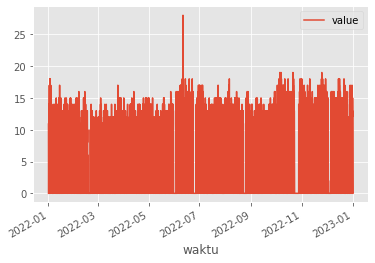

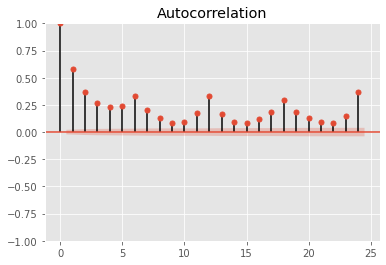

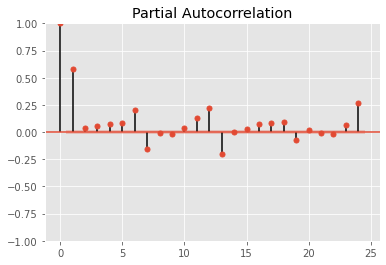

In [19]:
ex44_h.plot()
acf_pacf(ex44_h,24)

In [20]:
### Auto ARIMA model
auto_arima(ex44_h['value'],seasonal=False,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53674.817, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53150.875, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52586.882, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53672.817, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51414.967, Time=1.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=51412.364, Time=2.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=52761.724, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=51414.042, Time=2.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=51412.513, Time=2.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=52425.711, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=51410.378, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=51412.982, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8784
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -25701.189
Date:                Thu, 09 Feb 2023   AIC                          51410.378
Time:                        19:12:54   BIC                          51438.700
Sample:                             0   HQIC                         51420.027
                               - 8784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4904      0.011     45.008      0.000       0.469       0.512
ar.L2         -0.0244      0.011     -2.274      0.023      -0.045      -0.003
ma.L1         -0.9549      0.004   -237.510      0.000      -0.963      -0.947
sigma2        20.3776      0.359     56.743      0.000      19.674      21.081
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                71.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

prophet model

day

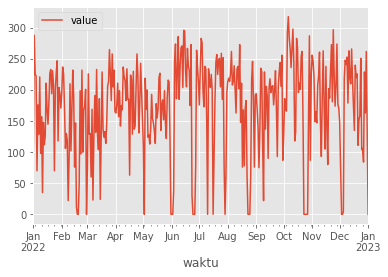

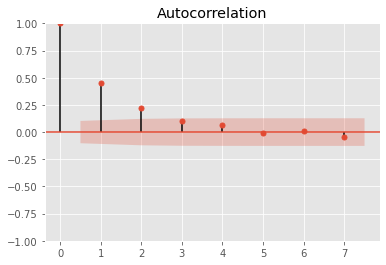

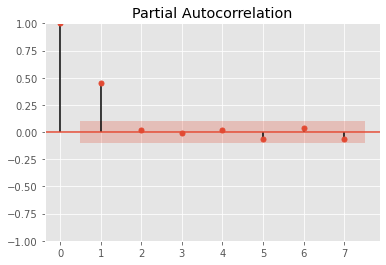

In [21]:
ex44_d.plot()
acf_pacf(ex44_d,7)

based on acf and pacf plot, the daily data is better modeled with ARIMA (1,x,y), by assuming the data doenst have seasonality.

In [22]:
### Auto ARIMA model
auto_arima(ex44_d['value'],seasonal=False,trace=True).summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4871.346, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4217.842, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4589.706, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4197.103, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4188.108, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4178.778, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4178.628, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4127.668, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4127.048, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4125.213, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4123.255, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4121.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2057.665
Date:                Thu, 09 Feb 2023   AIC                           4121.330
Time:                        19:12:56   BIC                           4133.038
Sample:                    01-01-2022   HQIC                          4125.982
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     92.6794      7.474     12.400      0.000      78.031     107.328
ar.L1          0.4585      0.045     10.208      0.000       0.370       0.547
sigma2      4475.9126    384.489     11.641      0.000    3722.329    5229.497
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.25
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.43
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

week

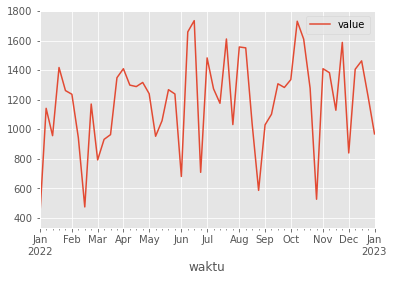

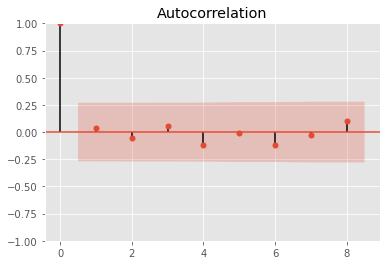

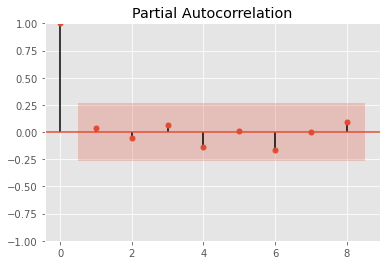

In [23]:
ex44_w.plot()
acf_pacf(ex44_w,8)

based on acf and pacf plot, the weekly data is better modeled with ARIMA (1,x,3), by assuming the data doenst have seasonality.

arima

In [24]:
### Auto ARIMA model
auto_arima(ex44_w['value'],seasonal=False,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=773.044, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=906.279, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=796.312, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=775.018, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=775.023, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=774.356, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=774.463, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=773.044, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=776.690, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=774.560, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=767.987, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=769.750, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=770.314, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -377.843
Date:                Thu, 09 Feb 2023   AIC                            767.687
Time:                        19:12:58   BIC                            779.509
Sample:                    01-02-2022   HQIC                           772.233
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1791.5010    469.504      3.816      0.000     871.291    2711.711
ar.L1         -0.5211      0.390     -1.336      0.182      -1.286       0.243
ma.L1          0.7092      0.436      1.628      0.103      -0.144       1.563
ma.L2         -0.0721      0.252     -0.286      0.775      -0.566       0.422
ma.L3          0.1416      0.197      0.719      0.472      -0.244       0.528
sigma2      8.953e+04   2.28e+04      3.932      0.000    4.49e+04    1.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.81   Prob(JB):                         0.25
Heteroskedasticity (H):               0.94   Skew:                            -0.53
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Prophet

daily data with prophet

19:12:58 - cmdstanpy - INFO - Chain [1] start processing
19:12:58 - cmdstanpy - INFO - Chain [1] done processing


0.37508848408041867

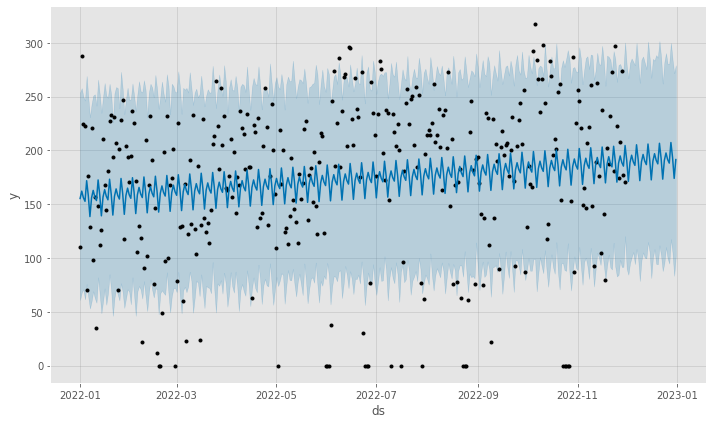

<Figure size 1080x576 with 0 Axes>

In [25]:
### Data Engineering
ex44_dp = ex44_d.reset_index().copy()
ex44_dp.columns = ['ds','y']
ex44_dp.index = ex44_dp.ds
train_44dp,test_44dp = train_test_split(ex44_dp,11)
train_44dp.reset_index(drop=True,inplace=True)
test_44dp.reset_index(drop=True,inplace=True)

### Modeling
m = Prophet()
m.fit(train_44dp)
future = m.make_future_dataframe(periods=test_44dp.shape[0])
forecast = m.predict(future)

### Data Viz
m.plot(forecast)
plt.figure(figsize=(15,8))

### Model eval
ypred = forecast.iloc[-test_44dp.shape[0]:]['yhat'].values
ynot  = test_44dp['y'].values

np.absolute(ypred-ynot).mean()/train_44dp.y.mean()

weekly data with prophet

19:12:58 - cmdstanpy - INFO - Chain [1] start processing
19:12:58 - cmdstanpy - INFO - Chain [1] done processing


0.16991971328683614

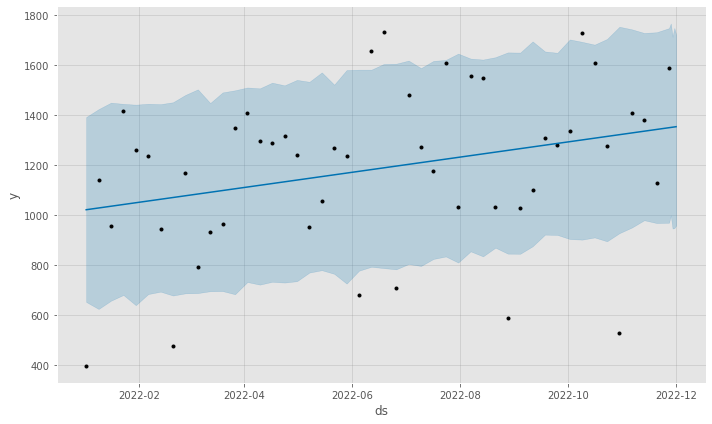

<Figure size 1080x576 with 0 Axes>

In [26]:
### Data Processing
ex44_wp = ex44_w.reset_index().copy()
ex44_wp.columns = ['ds','y']
ex44_wp.index = ex44_wp.ds
train_44wp,test_44wp = train_test_split(ex44_wp,11)
train_44wp.reset_index(drop=True,inplace=True)
test_44wp.reset_index(drop=True,inplace=True)

### Modeling
m = Prophet()
m.fit(train_44wp)
future = m.make_future_dataframe(periods=test_44wp.shape[0])
forecast = m.predict(future)

### Data Viz
m.plot(forecast)
plt.figure(figsize=(15,8))

### Model Eval
ypred = forecast.iloc[-test_44wp.shape[0]:]['yhat'].values
ynot  = test_44wp['y'].values

np.absolute(ypred-ynot).mean()/train_44wp.y.mean()

daily data

In [27]:
ex44_d.reset_index().copy()

,waktu,value
0,2022-01-01,110
1,2022-01-02,288
2,2022-01-03,225
3,2022-01-04,223
4,2022-01-05,70
...,...,...
361,2022-12-28,229
362,2022-12-29,163
363,2022-12-30,262
364,2022-12-31,125


19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:12:59 - cmdstanpy - INFO - Chain [1] done processing
19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:12:59 - cmdstanpy - INFO - Chain [1] done processing
19:12:59 - cmdstanpy - INFO - Chain [1] start processing


1 0.8303474401553519
2 0.24206672202496823


19:12:59 - cmdstanpy - INFO - Chain [1] done processing
19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:12:59 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing


3 0.2645900935161959
4 0.23195456195576078


19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing
19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing


5 0.2947268816768225
6 0.5492703082845724


19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing
19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing


7 0.3973972652043811
8 0.2107800137556919


19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing
19:13:00 - cmdstanpy - INFO - Chain [1] done processing


9 0.3134171682190017
10 0.4737664174097553


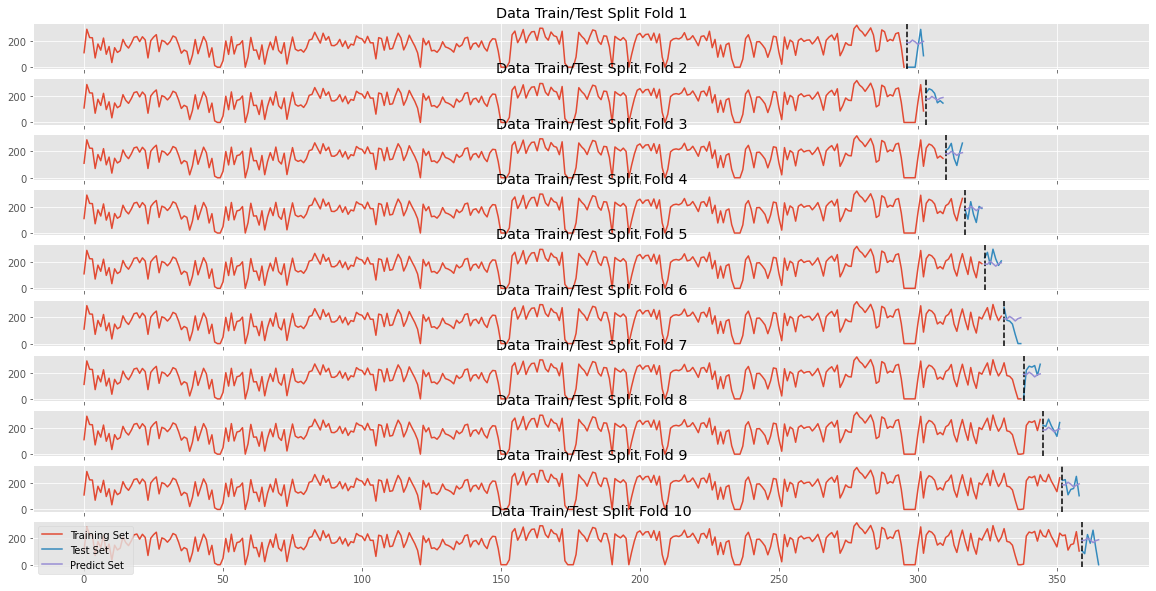

In [28]:
n = 10
tss = TimeSeriesSplit(n_splits=n,test_size=7)
df = ex44_d.reset_index().copy()
df.columns = ['ds','y']
fig, axs = plt.subplots(n, 1, figsize=(20, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold+1}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods=test.shape[0])
    forecast = m.predict(future)
    forecast.iloc[-test.shape[0]:]['yhat'].plot(ax=axs[fold],
                         label='Predict Set')
    ### Model eval
    ypred = forecast.iloc[-test.shape[0]:]['yhat'].values
    ynot  = test['y'].values
    fold += 1
    print(fold, np.absolute(ypred-ynot).mean()/train_44dp.y.mean())
plt.legend(loc='upper left')
plt.show()


19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing
19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing
19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing
19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing
19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing
19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1]

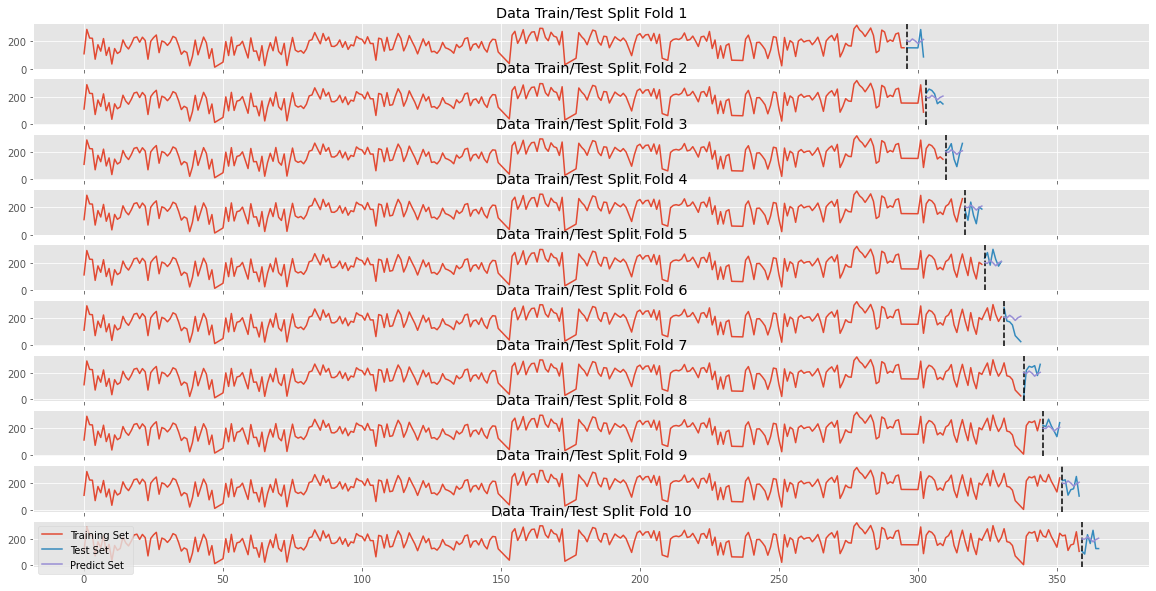

0.3068224029856851 0.15700104139585563 0.3078754265322885 0.3891932329875066


In [29]:
#### Linear Interpolation Inputation 
df_inter = ex44_d.reset_index().copy()
df_inter.columns = ['ds','y']
df_inter['y'] = df_inter.y.replace(0,np.NAN)
df_inter.y.interpolate(method='linear',inplace=True)

n = 10
tss = TimeSeriesSplit(n_splits=n,test_size=7)
df = df_inter
fig, axs = plt.subplots(n, 1, figsize=(20, 10), sharex=True)
mape_arr = []
fold = 0
for train_idx, val_idx in tss.split(df):
    #print(train_idx,val_idx)
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold+1}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods=test.shape[0])
    forecast = m.predict(future)
    forecast.iloc[-test.shape[0]:]['yhat'].plot(ax=axs[fold],
                         label='Predict Set')
    ### Model eval
    ypred = forecast.iloc[-test.shape[0]:]['yhat'].values
    ynot  = test['y'].values
    mape_arr.append(np.absolute(ypred-ynot).mean()/train.y.mean())
    fold += 1
    #print(fold, np.absolute(ypred-ynot).mean()/train_44dp.y.mean())
plt.legend(loc='upper left')
plt.show()
print(np.array(mape_arr).mean(),np.array(mape_arr).min(),mape_arr[-2],mape_arr[-1])


weekly data

19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1]

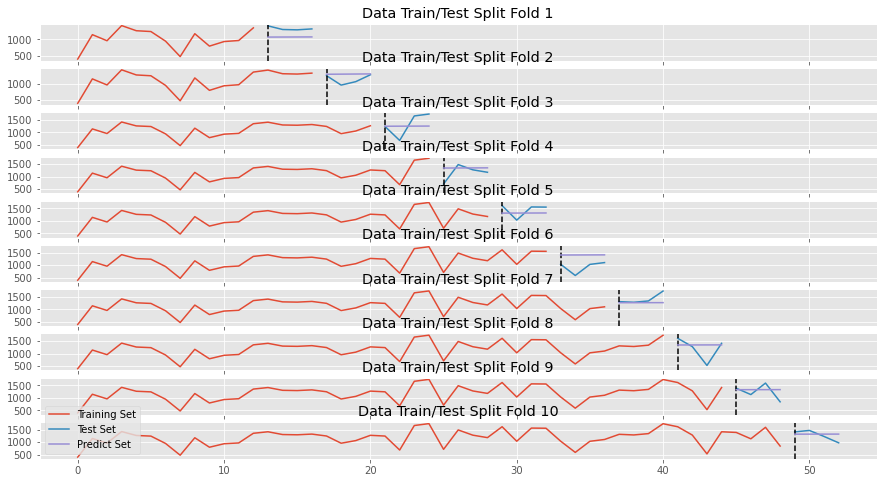

0.23475631950819126 0.1292415096845297 0.21382036469797414 0.14426676283713563


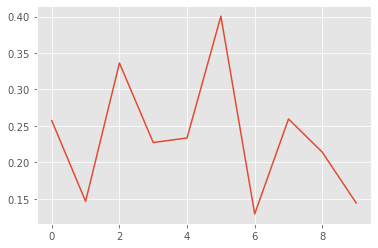

In [30]:
n = 10
tss = TimeSeriesSplit(n_splits=n)

df = ex44_w.reset_index().copy()
df.columns = ['ds','y']
fig, axs = plt.subplots(n, 1, figsize=(15, 8), sharex=True)
fold = 0
mape_arr = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold+1}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods=test.shape[0])
    forecast = m.predict(future)
    ### Model eval
    ypred = forecast.iloc[-test.shape[0]:]['yhat'].values
    ynot  = test['y'].values
    forecast.iloc[-test.shape[0]:]['yhat'].plot(ax=axs[fold],
                         label='Predict Set')
    fold += 1
    #print(fold, np.absolute(ypred-ynot).mean()/train.y.mean())
    mape_arr.append(np.absolute(ypred-ynot).mean()/train.y.mean())
plt.legend()
plt.show()
plt.plot(np.arange(len(mape_arr)),mape_arr)
print(np.array(mape_arr).mean(),np.array(mape_arr).min(),mape_arr[-2],mape_arr[-1])

19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1]

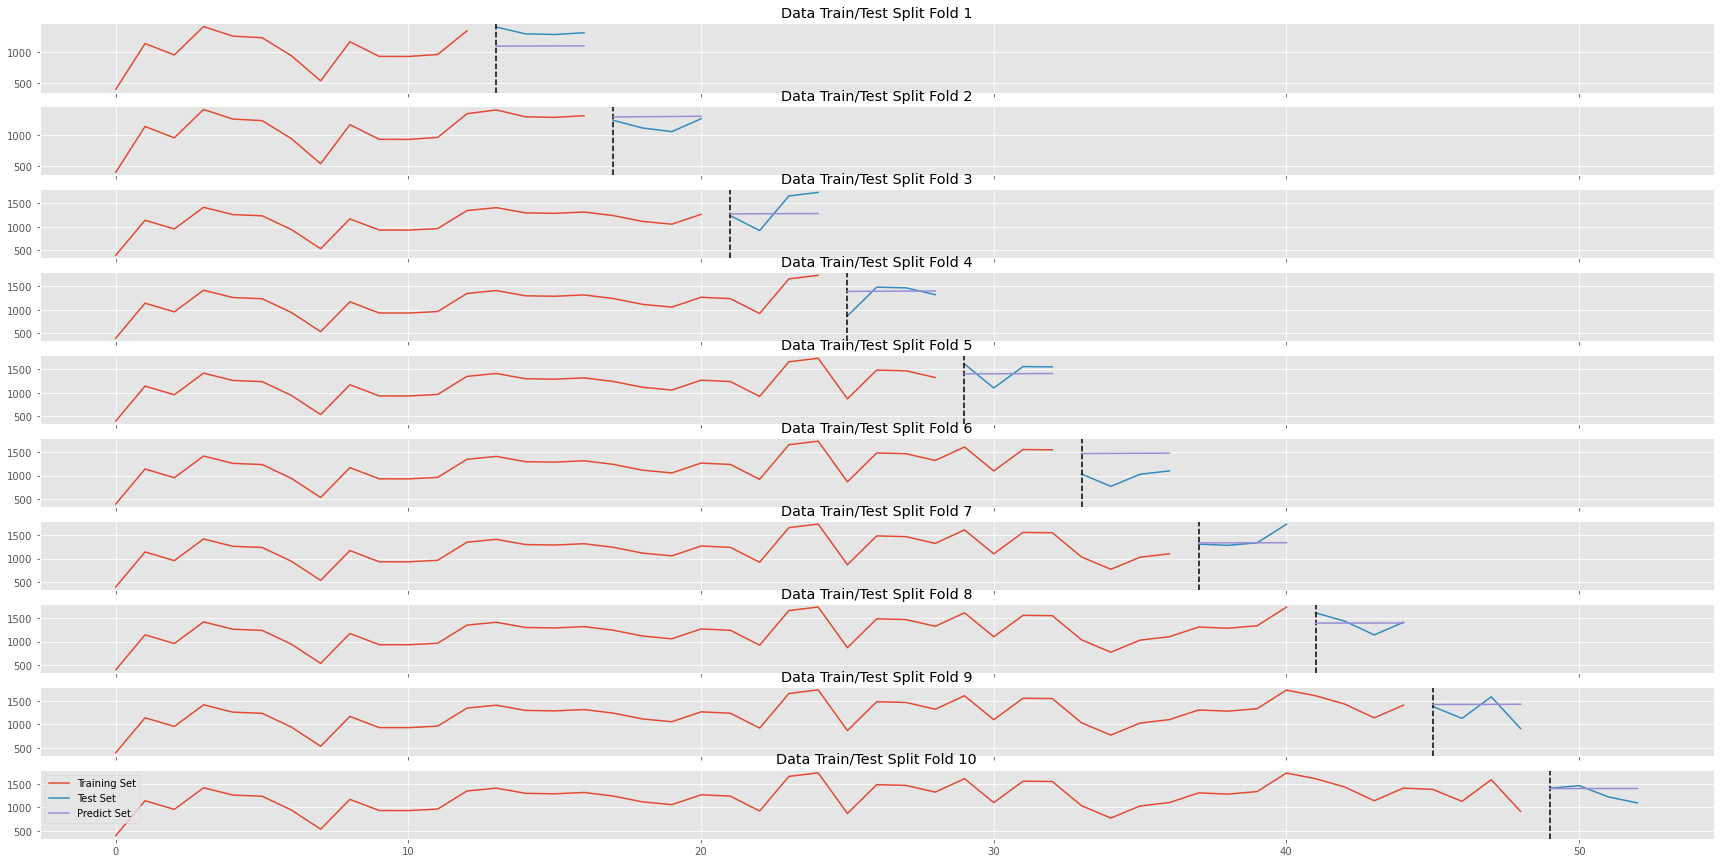

0.18919789925340444 0.10021848432899073 0.11361353566463865
[0.22206375358399164, 0.11991903713376632, 0.27622185589414905, 0.16440229186561328, 0.17160641862551518, 0.4073365853195156, 0.10021848432899073, 0.10890351070299074, 0.20769351941487318, 0.11361353566463865]


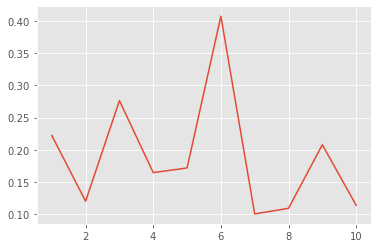

In [31]:
# Linear Interpolation Inputation 
df_inter_week = df_inter.copy()
df_inter_week.index = df_inter_week.ds
df_inter_week = df_inter_week.resample('W').sum().reset_index()

n = 10
tss = TimeSeriesSplit(n_splits=n,test_size=4)

df = df_inter_week
fig, axs = plt.subplots(n, 1, figsize=(30, 15), sharex=True)
fold = 0
mape_arr = []
for train_idx, val_idx in tss.split(df):
    #print(train_idx,val_idx)
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold+1}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods=test.shape[0])
    forecast = m.predict(future)
    ### Model eval
    ypred = forecast.iloc[-test.shape[0]:]['yhat'].values
    ynot  = test['y'].values
    forecast.iloc[-test.shape[0]:]['yhat'].plot(ax=axs[fold],
                         label='Predict Set')
    fold += 1
    #print(fold, np.absolute(ypred-ynot).mean()/train.y.mean())
    mape_arr.append(np.absolute(ypred-ynot).mean()/train.y.mean())
plt.legend()
plt.show()
plt.plot(np.arange(len(mape_arr))+1,mape_arr)
print(np.array(mape_arr).mean(),np.array(mape_arr).min(),mape_arr[-1])
print(mape_arr)